In [29]:
!pip install nibabel --upgrade

In [30]:
import nibabel as nib
import nibabel.processing
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Head_MR = nib.load("/MRHead.nii.gz")

In [33]:
Head_MR_data = Head_MR.get_fdata()

In [34]:
affine = Head_MR.affine
shape = Head_MR.shape

In [36]:
print("affine:",affine)
print("shape:",shape)

affine: [[  0.           0.           1.29999542 -86.64489746]
 [ -1.           0.           0.         133.92860413]
 [  0.          -1.           0.         116.78569794]
 [  0.           0.           0.           1.        ]]
shape: (256, 256, 130)


In [37]:
print("Head_MR.header.get_zooms():",Head_MR.header.get_zooms())
print("nib.aff2axcodes(affine):",nib.aff2axcodes(affine))

Head_MR.header.get_zooms(): (np.float32(1.0), np.float32(1.0), np.float32(1.2999954))
nib.aff2axcodes(affine): ('P', 'I', 'R')


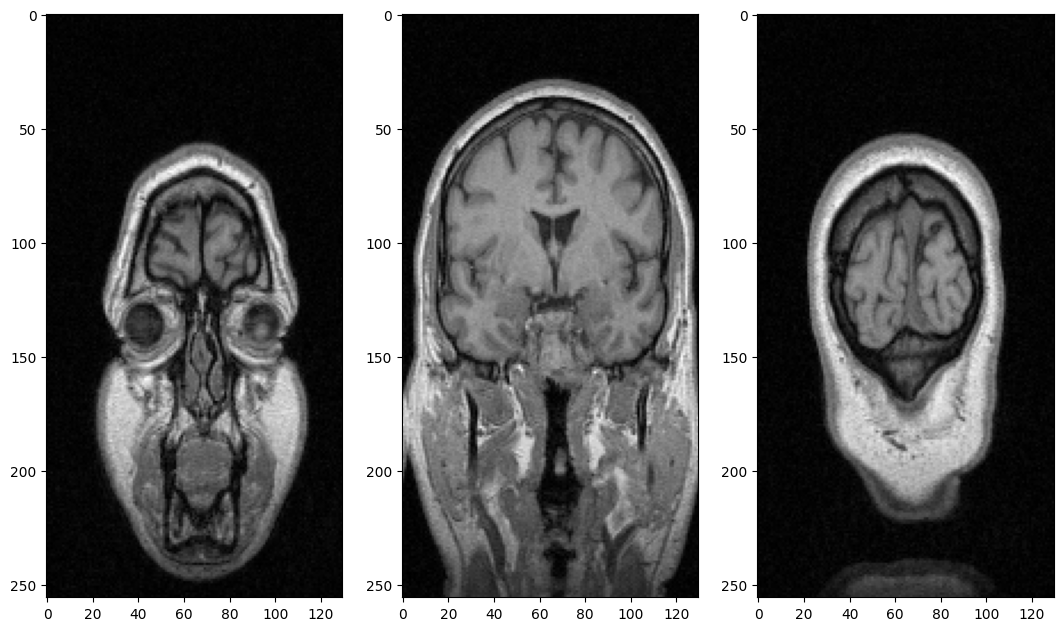

In [38]:
fig , axis = plt.subplots(1,3,figsize=(13,13))
axis[0].imshow(Head_MR_data[50,:,: ], cmap="gray")
axis[1].imshow(Head_MR_data[120,:,:] , cmap="gray")
axis[2].imshow(Head_MR_data[220,:,: ], cmap="gray")


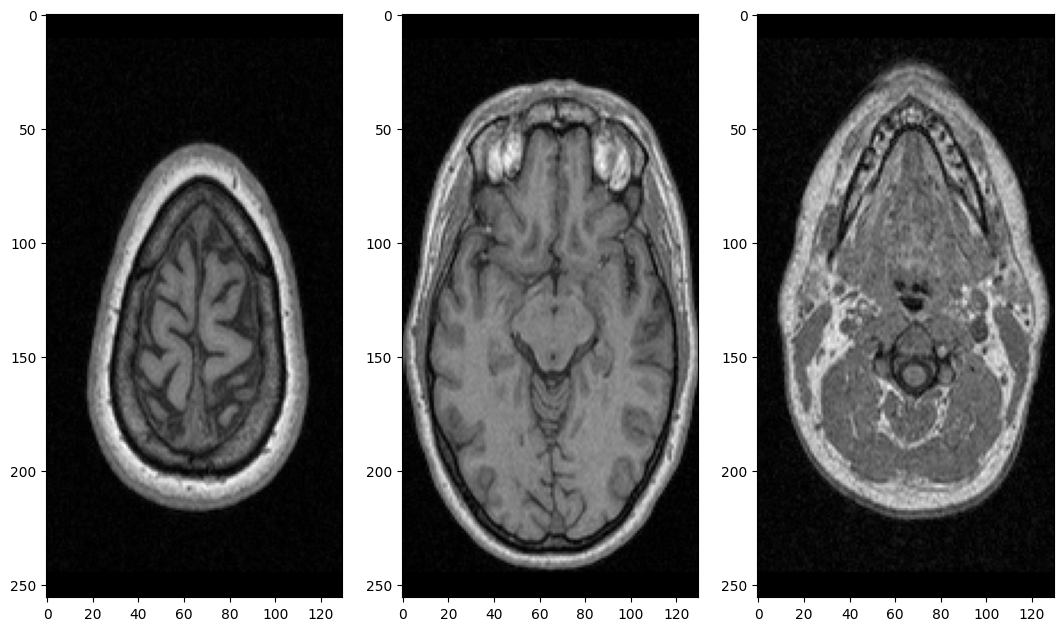

In [39]:
fig , axis = plt.subplots(1,3,figsize=(13,13))
axis[0].imshow(Head_MR_data[:,50,: ], cmap="gray")
axis[1].imshow(Head_MR_data[:,120,:] , cmap="gray")
axis[2].imshow(Head_MR_data[:,220,: ], cmap="gray")

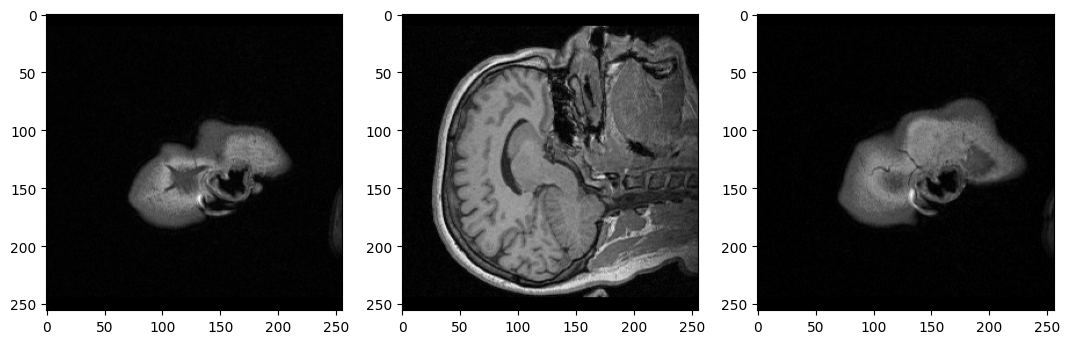

In [40]:
fig , axis = plt.subplots(1,3,figsize=(13,13))
axis[0].imshow(Head_MR_data[:,:,6 ], cmap="gray")
axis[1].imshow(Head_MR_data[:,:,75] , cmap="gray")
axis[2].imshow(Head_MR_data[:,:,125 ], cmap="gray")

In [41]:
voxel_coords = np.array((0,0,0,1))
physical_coords = affine @ voxel_coords

In [42]:
print("physical_coords:",physical_coords)
print("affine [: , 3:]:",affine [: , 3:])

physical_coords: [-86.64489746 133.92860413 116.78569794   1.        ]
affine [: , 3:]: [[-86.64489746]
 [133.92860413]
 [116.78569794]
 [  1.        ]]


In [43]:
voxel_coords_manual = np.array((0,0,0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3 , 3]
physical_coords_manual


array([-86.64489746, 133.92860413, 116.78569794])

In [44]:
physical_coords = [-86.64489746, 133.92860413, 116.78569794,   1.        ]
(np.linalg.inv(affine) @ physical_coords ).round()

array([-0., -0.,  0.,  1.])

In [46]:
voxel_size = (2,2,2)
Head_MR_resized = nibabel.processing.conform(Head_MR , (128,128,65),voxel_size , orientation="PIR")
Head_MR_resized_data = Head_MR_resized.get_fdata()
print(Head_MR_resized.shape)
print(Head_MR_resized.header.get_zooms())

(128, 128, 65)
(np.float32(2.0), np.float32(2.0), np.float32(2.0))


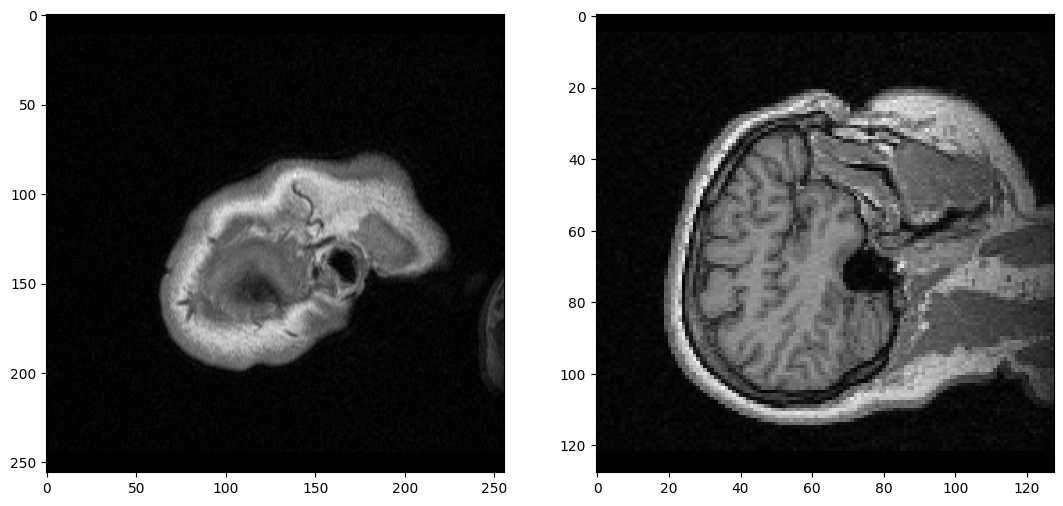

In [47]:
fig,axis = plt.subplots(1,2,figsize=(13,13))
axis[0].imshow(Head_MR_data[:,:,10], cmap = 'gray')
axis[1].imshow(Head_MR_resized_data[:,:,10], cmap = 'gray')


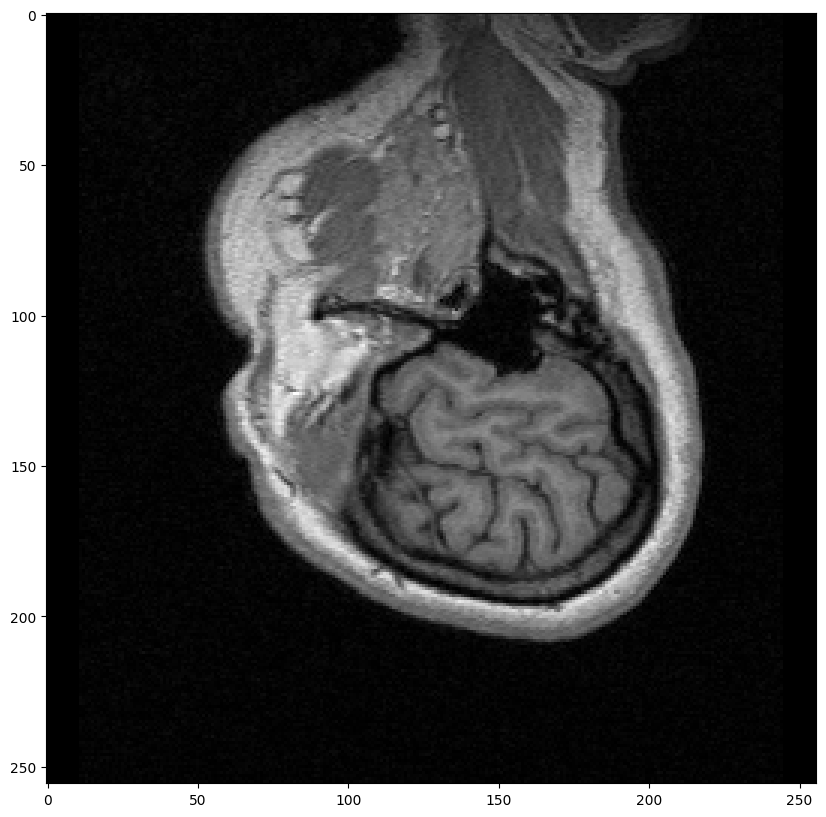

In [48]:
Head_MR_data_standard = Head_MR_data/3071
plt.figure(figsize = (10,10))
plt.imshow(np.rot90(Head_MR_data_standard[:,:,20]) , cmap = 'gray')

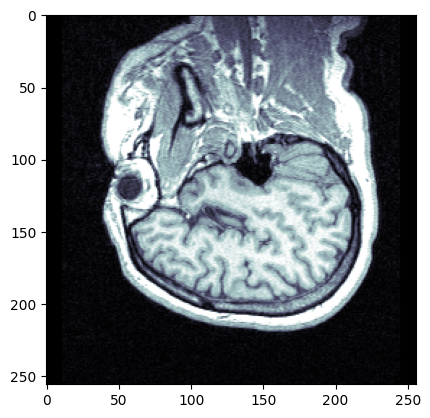

In [49]:
Head_MR_window = np.clip(Head_MR_data , 0,100)
plt.figure()
plt.imshow(np.rot90(Head_MR_window[:,:,100]),cmap = "bone")

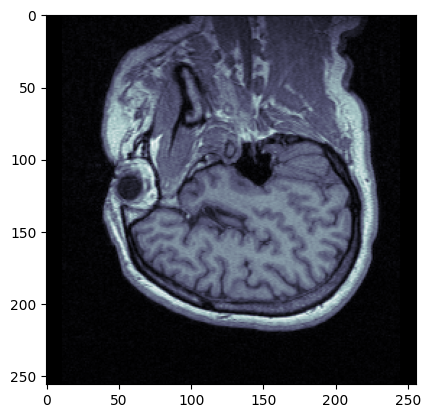

In [50]:
Head_MR_window = np.clip(Head_MR_data , 0,300)
plt.figure()
plt.imshow(np.rot90(Head_MR_window[:,:,100]),cmap = "bone")

In [51]:
mean , std = np.mean(Head_MR_data) , np.std(Head_MR_data)
Head_MR_data_norm = (Head_MR_data - mean)/std
Head_MR_data_standardized = (Head_MR_data_norm - np.min(Head_MR_data_norm))/(np.max(Head_MR_data_norm)-np.min(Head_MR_data_norm))


In [52]:
np.mean(Head_MR_data) , np.max(Head_MR_data) , np.min(Head_MR_data)

(np.float64(33.69384178748498), np.float64(279.0), np.float64(0.0))

In [53]:
np.mean(Head_MR_data_standardized) , np.max(Head_MR_data_standardized) , np.min(Head_MR_data_standardized)

(np.float64(0.12076645801965935), np.float64(1.0), np.float64(0.0))